In [165]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [5, 5]

In [141]:
# display all columns in preview
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [142]:
# load the dataset
df = pd.read_csv("iXperience_dataset.csv",sep = None)

In [143]:
df.head()

,ID,Brand,Language,Website,created,Client email domain,Enquiry type,Enquiry status,Currency,Client budget,Arrival date,Arrival date text,Departure date,Num nights,Stay duration,Adults,Children,Flights booked,Residential country code,Detected country code,Detected city,Reviewed availability,Reviewed grade,Reviewed budget,Reviewed quality,Budget value,Click path,User agent,User repeat,User referral,Client last contact,Consultant last contact,First response time,Assignment response time,Has emails,Has calls,is open,is dead,Client email,Consultant email,Client calls,Consultant calls,Lead status,No response,No contact,GA source,GA medium,Device,GA keyword,GA campaign,GA language,GA country,Session duration,is booking,Last invoice date,Last travel date,Sales (excl vat),GP %,Sessions,Avg. session length (sec),Avg. pageviews per session,Pageviews,Hits,Status,Status Type,Enquiry open,Enquiry dead,Reason,Quality
0,82983.0,Rhino Africa - English,English,Rhino Africa,2016-01-01 00:20:49,yahoo.com,Website,Assigned,NaN,Luxury,19 06 2016,NaN,NaN,NaN,12,4.0,0.0,0.0,NaN,US,Shrewsbury,NaN,Package,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,tablet,(not provided),(not set),en-us,United States,354.0,0.0,NaN,NaN,0.00000,NaN,1.0,354.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,82984.0,Rhino Africa - English,English,Rhino Africa,2016-01-01 00:55:12,att.net,Website,Assigned,NaN,Standard,03 04 2016,NaN,NaN,NaN,6,2.0,0.0,1.0,NaN,US,Stratford,NaN,Short Package,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(direct),(none),desktop,(not set),(not set),en-us,United States,1793.0,1.0,07 03 2017,06 11 2017,20621.66778,0.232503,1.0,1793.0,20.0,20.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,82985.0,Rhino Africa - English,English,Rhino Africa,2016-01-01 04:15:47,sunlife.com,Website,Assigned,NaN,Luxury,22 07 2016,NaN,NaN,NaN,15,2.0,0.0,0.0,NaN,NaN,NaN,NaN,Package,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(direct),(none),desktop,(not set),(not set),en-us,Canada,1867.0,0.0,NaN,NaN,0.00000,NaN,1.0,1867.0,31.0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20854.0,Londolozi - English,English,Londolozi,2016-01-01 05:27:56,gmail.com,Website,Assigned,NaN,NaN,18 07 2016,NaN,NaN,NaN,3-4 nights,2.0,2.0,NaN,NaN,PH,Calamba,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,cpc,desktop,www.londolozi.com,[a:LON][c:GBR][l:EN][n:GSN][g:Brand][t:www],en-us,United Kingdom,293.0,1.0,24 03 2017,01 11 2017,35799.28158,0.221695,1.0,283.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20855.0,Londolozi - English,English,Londolozi,2016-01-01 05:27:56,gmail.com,Website,Assigned,NaN,NaN,18 07 2016,NaN,NaN,NaN,3-4 nights,2.0,2.0,NaN,NaN,PH,Calamba,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,desktop,(not provided),(not set),en-us,United States,2858.0,1.0,03 04 2017,12 05 2017,13996.70640,0.227259,1.0,283.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.shape

(112333, 69)

## Data Cleaning

In [145]:
# check duplicates
df.duplicated().sum()

0

In [146]:
# sex index as ID 
df = df.set_index('ID')

In [147]:
# last row is meaningless (only NaN and 0)
# drop last row
df = df.iloc[:-1]

In [148]:
# Since our target variable is column "is booking", we need to drop the rows where "is booking" is null.
# we also need to drop the rows where "is booking" is netiher 0 nor 1 (invalid information)
df = df.dropna(subset = ['is booking'])

In [149]:
df['is booking'].value_counts()

0.00       100638
1.00        11076
826.00          1
4306.45         1
Name: is booking, dtype: int64

In [150]:
df[(df['is booking'] == 826)].index

Float64Index([85425.0], dtype='float64', name='ID')

In [151]:
df[(df['is booking'] == 4306.45)].index

Float64Index([57555.0], dtype='float64', name='ID')

In [152]:
df = df.drop([85425,57555])
df.shape

(111714, 68)

In [153]:
df['Sales (excl vat)'].notnull().value_counts()

True    111714
Name: Sales (excl vat), dtype: int64

In [154]:
df['GP %'] = df['GP %'].fillna(0)

In [155]:
data.columns

Index(['ID', 'Brand', 'Language', 'Website', 'created', 'Client email domain', 'Enquiry type', 'Enquiry status', 'Currency', 'Client budget', 'Arrival date', 'Arrival date text', 'Departure date', 'Num nights', 'Stay duration', 'Adults', 'Children', 'Flights booked', 'Residential country code', 'Detected country code', 'Detected city', 'Reviewed availability', 'Reviewed grade', 'Reviewed budget', 'Reviewed quality', 'Budget value', 'Click path', 'User agent', 'User repeat', 'User referral', 'Client last contact', 'Consultant last contact', 'First response time', 'Assignment response time', 'Has emails', 'Has calls', 'is open', 'is dead', 'Client email', 'Consultant email', 'Client calls', 'Consultant calls', 'Lead status', 'No response', 'No contact', 'GA source', 'GA medium', 'Device', ' GA keyword', 'GA campaign', 'GA language', 'GA country', 'Session duration', 'is booking', 'Last invoice date', 'Last travel date', 'Sales (excl vat)', 'GP %', 'Sessions',
       'Avg. session length 

In [156]:
# Delete the blank space in the front of column name " GA keyword"
df = df.rename({' GA keyword': 'GA keyword'}, axis=1)

In [157]:
df.head()

,Brand,Language,Website,created,Client email domain,Enquiry type,Enquiry status,Currency,Client budget,Arrival date,Arrival date text,Departure date,Num nights,Stay duration,Adults,Children,Flights booked,Residential country code,Detected country code,Detected city,Reviewed availability,Reviewed grade,Reviewed budget,Reviewed quality,Budget value,Click path,User agent,User repeat,User referral,Client last contact,Consultant last contact,First response time,Assignment response time,Has emails,Has calls,is open,is dead,Client email,Consultant email,Client calls,Consultant calls,Lead status,No response,No contact,GA source,GA medium,Device,GA keyword,GA campaign,GA language,GA country,Session duration,is booking,Last invoice date,Last travel date,Sales (excl vat),GP %,Sessions,Avg. session length (sec),Avg. pageviews per session,Pageviews,Hits,Status,Status Type,Enquiry open,Enquiry dead,Reason,Quality
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
82983.0,Rhino Africa - English,English,Rhino Africa,2016-01-01 00:20:49,yahoo.com,Website,Assigned,NaN,Luxury,19 06 2016,NaN,NaN,NaN,12,4.0,0.0,0.0,NaN,US,Shrewsbury,NaN,Package,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,tablet,(not provided),(not set),en-us,United States,354.0,0.0,NaN,NaN,0.00000,0.000000,1.0,354.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
82984.0,Rhino Africa - English,English,Rhino Africa,2016-01-01 00:55:12,att.net,Website,Assigned,NaN,Standard,03 04 2016,NaN,NaN,NaN,6,2.0,0.0,1.0,NaN,US,Stratford,NaN,Short Package,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(direct),(none),desktop,(not set),(not set),en-us,United States,1793.0,1.0,07 03 2017,06 11 2017,20621.66778,0.232503,1.0,1793.0,20.0,20.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
82985.0,Rhino Africa - English,English,Rhino Africa,2016-01-01 04:15:47,sunlife.com,Website,Assigned,NaN,Luxury,22 07 2016,NaN,NaN,NaN,15,2.0,0.0,0.0,NaN,NaN,NaN,NaN,Package,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(direct),(none),desktop,(not set),(not set),en-us,Canada,1867.0,0.0,NaN,NaN,0.00000,0.000000,1.0,1867.0,31.0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20854.0,Londolozi - English,English,Londolozi,2016-01-01 05:27:56,gmail.com,Website,Assigned,NaN,NaN,18 07 2016,NaN,NaN,NaN,3-4 nights,2.0,2.0,NaN,NaN,PH,Calamba,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,cpc,desktop,www.londolozi.com,[a:LON][c:GBR][l:EN][n:GSN][g:Brand][t:www],en-us,United Kingdom,293.0,1.0,24 03 2017,01 11 2017,35799.28158,0.221695,1.0,283.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20855.0,Londolozi - English,English,Londolozi,2016-01-01 05:27:56,gmail.com,Website,Assigned,NaN,NaN,18 07 2016,NaN,NaN,NaN,3-4 nights,2.0,2.0,NaN,NaN,PH,Calamba,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,organic,desktop,(not provided),(not set),en-us,United States,2858.0,1.0,03 04 2017,12 05 2017,13996.70640,0.227259,1.0,283.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


## Feature analysis

### Key metrics: "is booking", "GP %", "Sales (excl vat)"

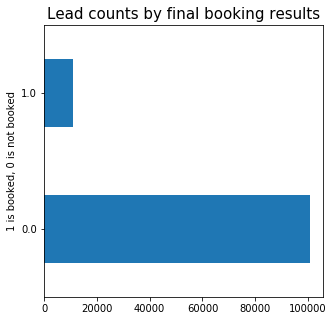

In [166]:
df['is booking'].value_counts().plot.barh();
plt.title("Lead counts by final booking results", size=15);
plt.ylabel("1 is booked, 0 is not booked", size=10);

### Language

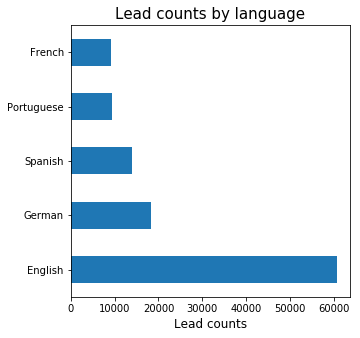

In [183]:
df['Language'].value_counts().plot.barh();
plt.title("Lead counts by language", size=15);
plt.xlabel("Lead counts", size=12);

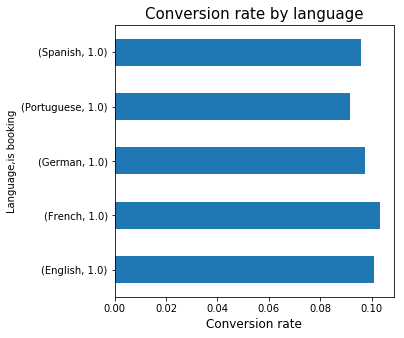

In [295]:
df.groupby('Language')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by language", size=15);
plt.xlabel("Conversion rate", size=12);

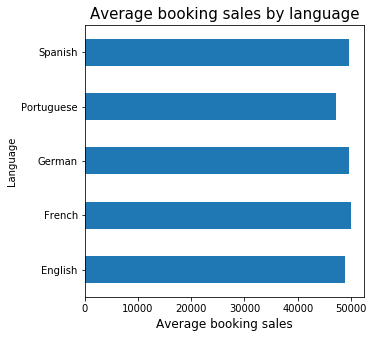

In [184]:
df[df['is booking']==1].groupby('Language')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by language", size=15);
plt.xlabel("Average booking sales", size=12);

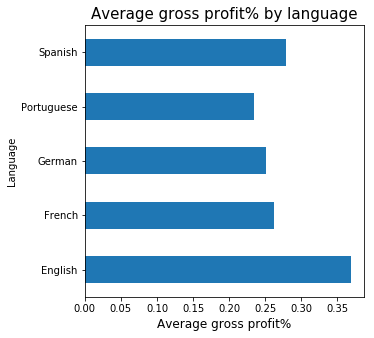

In [187]:
df[df['is booking']==1].groupby('Language')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by language", size=15);
plt.xlabel("Average gross profit%", size=12);

### Website

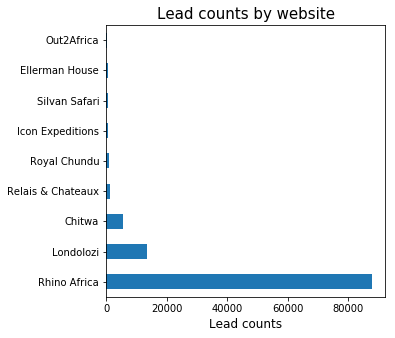

In [181]:
df['Website'].value_counts().plot.barh();
plt.title("Lead counts by website", size=15);
plt.xlabel("Lead counts", size=12);

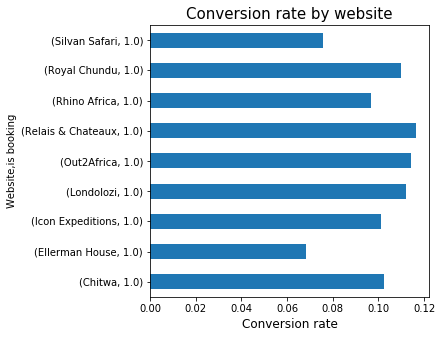

In [296]:
df.groupby('Website')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by website", size=15);
plt.xlabel("Conversion rate", size=12);

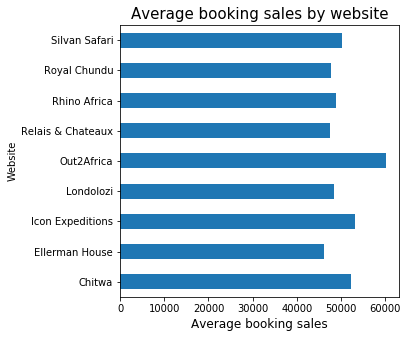

In [185]:
df[df['is booking']==1].groupby('Website')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by website", size=15);
plt.xlabel("Average booking sales", size=12);

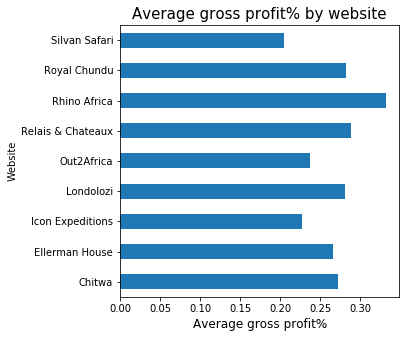

In [188]:
df[df['is booking']==1].groupby('Website')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by website", size=15);
plt.xlabel("Average gross profit%", size=12);

### Enquiry type

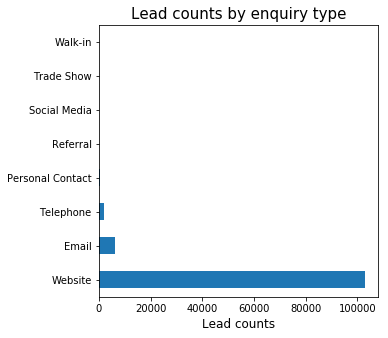

In [182]:
df['Enquiry type'].value_counts().plot.barh();
plt.title("Lead counts by enquiry type", size=15);
plt.xlabel("Lead counts", size=12);

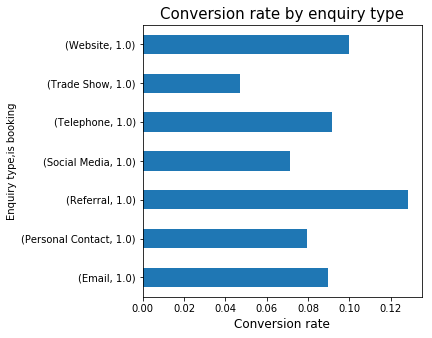

In [297]:
df.groupby('Enquiry type')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by enquiry type", size=15);
plt.xlabel("Conversion rate", size=12);

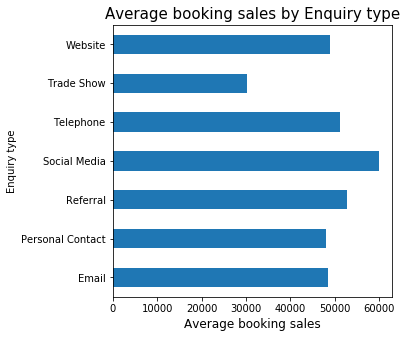

In [186]:
df[df['is booking']==1].groupby('Enquiry type')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Enquiry type", size=15);
plt.xlabel("Average booking sales", size=12);

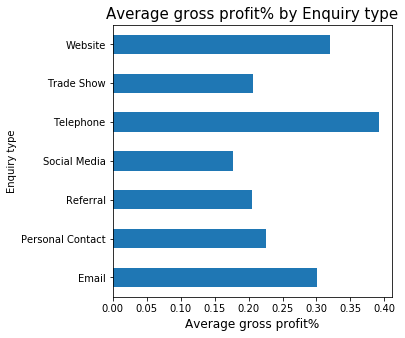

In [189]:
df[df['is booking']==1].groupby('Enquiry type')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Enquiry type", size=15);
plt.xlabel("Average gross profit%", size=12);

### Enquiry status

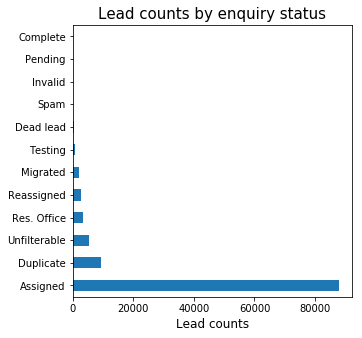

In [193]:
df['Enquiry status'].value_counts().plot.barh();
plt.title("Lead counts by enquiry status", size=15);
plt.xlabel("Lead counts", size=12);

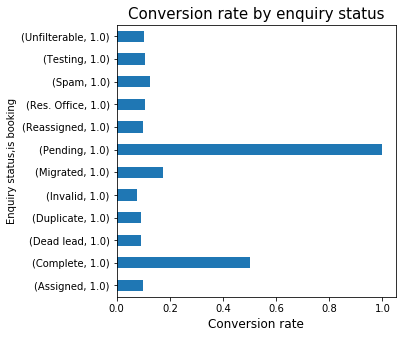

In [298]:
df.groupby('Enquiry status')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by enquiry status", size=15);
plt.xlabel("Conversion rate", size=12);

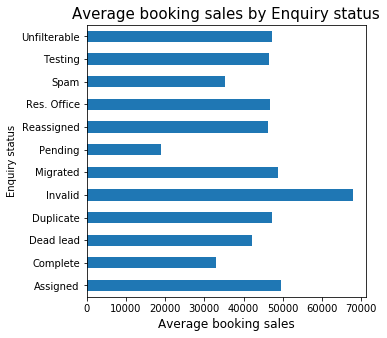

In [194]:
df[df['is booking']==1].groupby('Enquiry status')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Enquiry status", size=15);
plt.xlabel("Average booking sales", size=12);

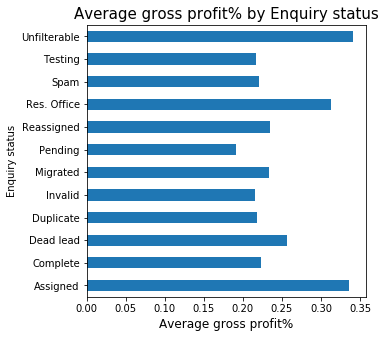

In [195]:
df[df['is booking']==1].groupby('Enquiry status')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Enquiry status", size=15);
plt.xlabel("Average gross profit%", size=12);

### Currency and Budget

In [200]:
# column "Budget value", current data type is object
# Some rows that are not numbers, we need to change these values to NaN
# then change the data type of "Budget value" from string to float
df.loc[df['Budget value'].str.isnumeric() == False, 'Budget value'] = np.nan
df['Budget value'] = pd.to_numeric(df['Budget value'])

# There are 29863 rows that have budget value of 0
# We assume that it's non applicable and set them to NaN
df.loc[df['Budget value'] == 0, 'Budget value'] = np.nan

# there are also 73 rows that have budget value but no currency specified
# We need to change these budget values to NaN
df.loc[(df['Budget value'].notnull()) & (df['Currency'].isnull()), 'Budget value'] = np.nan


In [198]:
# create currency exchange dictionary to map the "Currency" column into the its exchange rate with US Dollars

currency_exchange = {'USD':1,'usd':1,'eur':1.12,'EUR':1.12,
                     'gbp':1.26,'GBP':1.26,'zar':0.069,'ZAR':0.069,
                     'brl':0.26,'BRL':0.26,'aud':0.69,'AUD':0.69,
                     'cad':0.75,'CAD':0.75,'chf':1,'CHF':1}

df['Currency'] = df['Currency'].map(currency_exchange)

In [201]:
# Calculate the "Budget value" in US Dollars by multiplying its original value with the excahnge rate in "Currency" column

df.loc[(df['Currency'].notnull()) & (df['Currency'] != 1),
       'Budget value'] = df['Budget value'] * df['Currency']

df = df.round({'Budget value':1})

In [224]:
df['Budget value'].describe()

count    1.155300e+04
mean     1.933563e+06
std      1.322516e+08
min      1.000000e-01
25%      1.500000e+03
50%      2.800000e+03
75%      4.000000e+03
max      1.000000e+10
Name: Budget value, dtype: float64

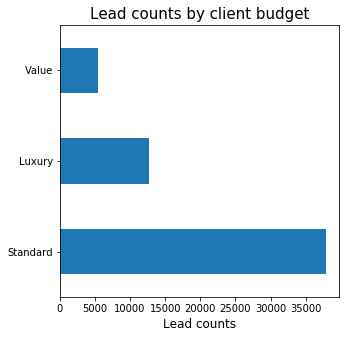

In [202]:
df['Client budget'].value_counts().plot.barh();
plt.title("Lead counts by client budget", size=15);
plt.xlabel("Lead counts", size=12);

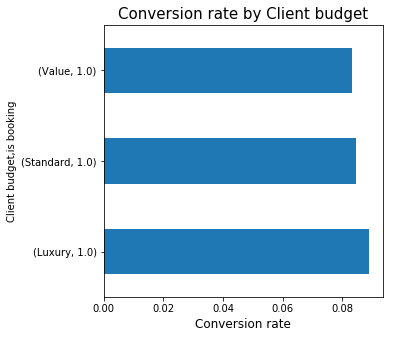

In [299]:
df.groupby('Client budget')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Client budget", size=15);
plt.xlabel("Conversion rate", size=12);

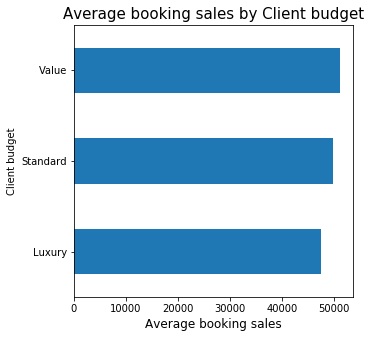

In [203]:
df[df['is booking']==1].groupby('Client budget')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Client budget", size=15);
plt.xlabel("Average booking sales", size=12);

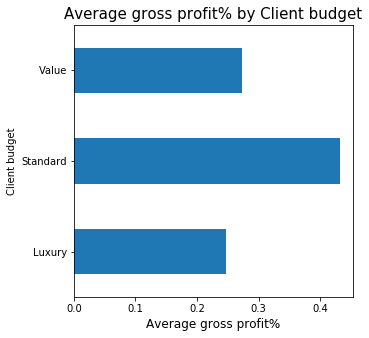

In [204]:
df[df['is booking']==1].groupby('Client budget')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Client budget", size=15);
plt.xlabel("Average gross profit%", size=12);

### Adults & Children

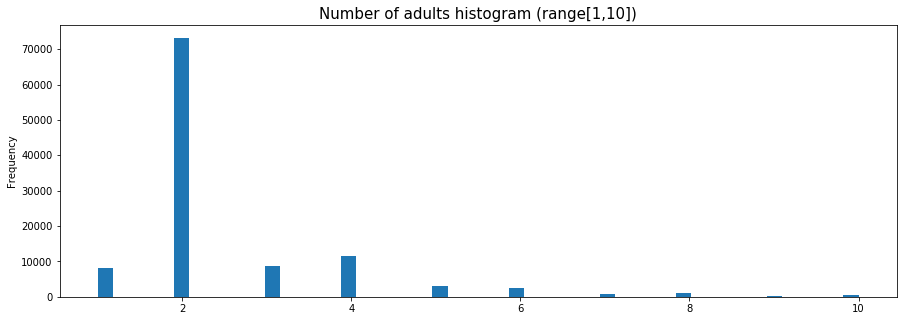

In [493]:
df['Adults'].plot.hist(bins=50,range=(1,10),figsize=(15,5));
plt.title('Number of adults histogram (range[1,10])',size=15);

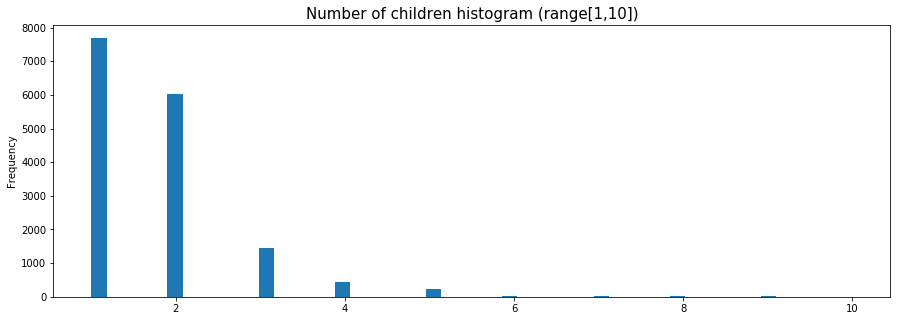

In [494]:
df['Children'].plot.hist(bins=50,range=(1,10),figsize=(15,5));
plt.title('Number of children histogram (range[1,10])',size=15);

### Flights booked

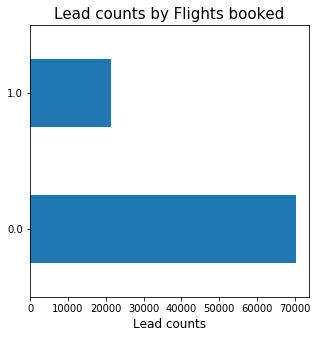

In [320]:
df['Flights booked'].value_counts().plot.barh();
plt.title("Lead counts by Flights booked", size=15);
plt.xlabel("Lead counts", size=12);

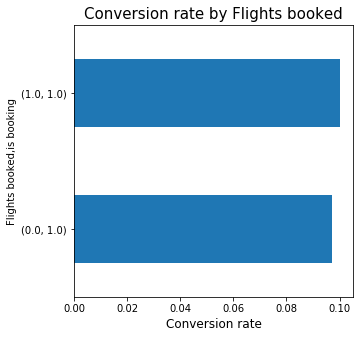

In [321]:
df.groupby('Flights booked')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Flights booked", size=15);
plt.xlabel("Conversion rate", size=12);

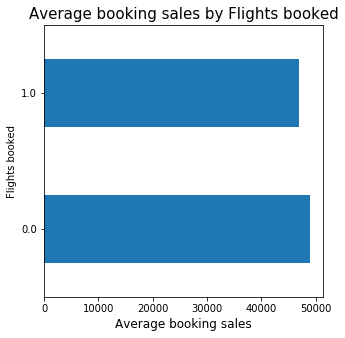

In [322]:
df[df['is booking']==1].groupby('Flights booked')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Flights booked", size=15);
plt.xlabel("Average booking sales", size=12);

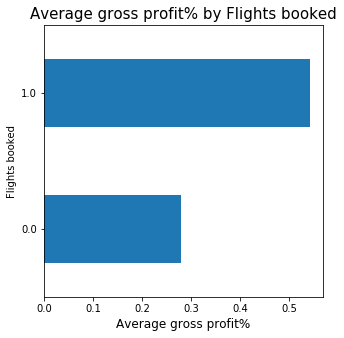

In [323]:
df[df['is booking']==1].groupby('Flights booked')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Flights booked", size=15);
plt.xlabel("Average gross profit%", size=12);

### Country code

In [324]:
# There are some rows whose Detected country code is different from Residential country code
# We assume that the Residential country code is incorrect (for example, for those whose detected city are in California.
# the residential code is CA, which makes the residential code less credible)
# Therefore, we combine the two columns and prefer the "Detected country code" when the two column values conflict

df.loc[(df['Detected country code'].isnull()) & (df['Residential country code'].notnull()),
       'Detected country code'] = df['Residential country code']

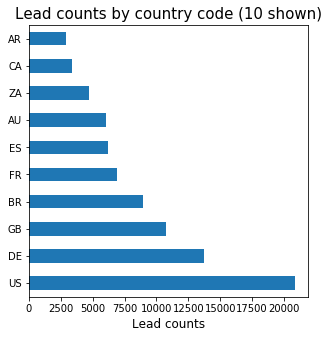

In [327]:
df['Detected country code'].value_counts().head(10).plot.barh();
plt.title("Lead counts by country code (10 shown)", size=15);
plt.xlabel("Lead counts", size=12);

### Reviewed availability

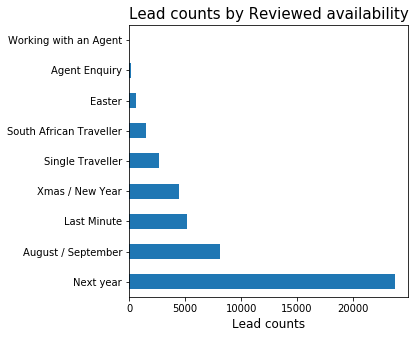

In [344]:
df['Reviewed availability'].value_counts().plot.barh();
plt.title("Lead counts by Reviewed availability", size=15);
plt.xlabel("Lead counts", size=12);

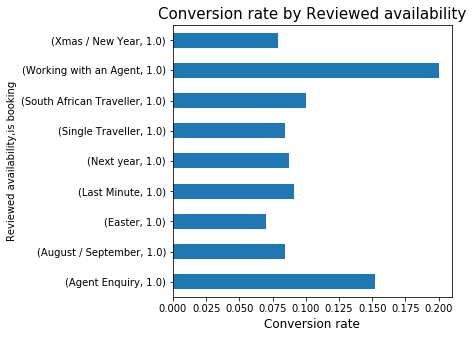

In [345]:
df.groupby('Reviewed availability')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Reviewed availability", size=15);
plt.xlabel("Conversion rate", size=12);


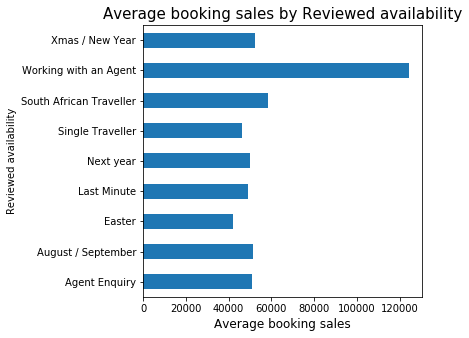

In [346]:
df[df['is booking']==1].groupby('Reviewed availability')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Reviewed availability", size=15);
plt.xlabel("Average booking sales", size=12);

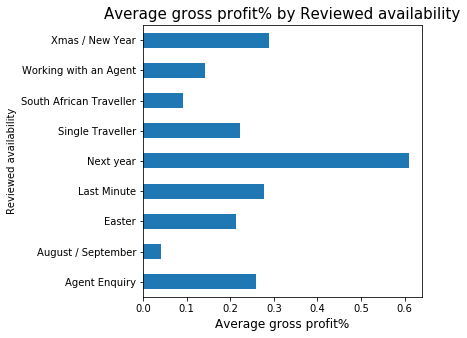

In [347]:
df[df['is booking']==1].groupby('Reviewed availability')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Reviewed availability", size=15);
plt.xlabel("Average gross profit%", size=12);

### Reviewed grade

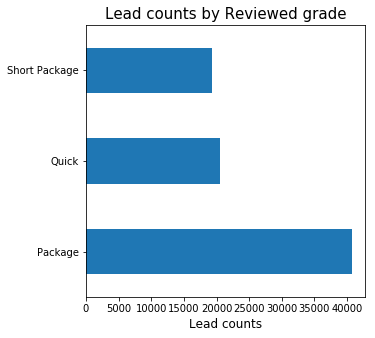

In [353]:
df['Reviewed grade'].value_counts().plot.barh();
plt.title("Lead counts by Reviewed grade", size=15);
plt.xlabel("Lead counts", size=12);

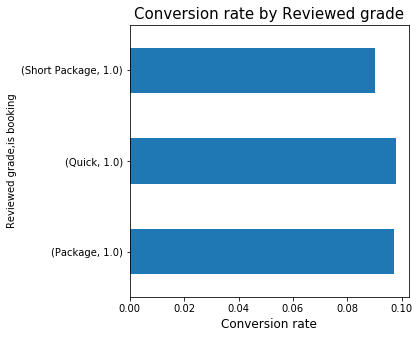

In [354]:
df.groupby('Reviewed grade')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Reviewed grade", size=15);
plt.xlabel("Conversion rate", size=12);

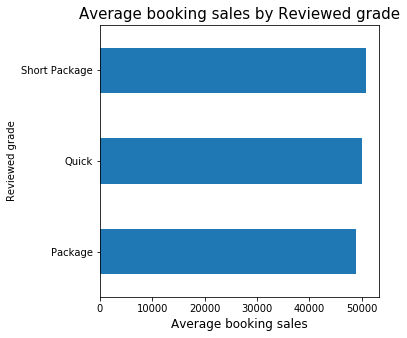

In [355]:
df[df['is booking']==1].groupby('Reviewed grade')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Reviewed grade", size=15);
plt.xlabel("Average booking sales", size=12);

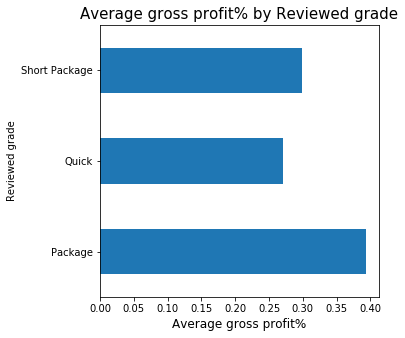

In [356]:
df[df['is booking']==1].groupby('Reviewed grade')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Reviewed grade", size=15);
plt.xlabel("Average gross profit%", size=12);

### Reviewed budget

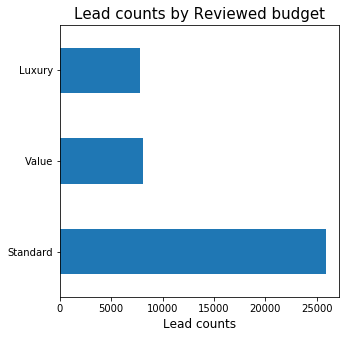

In [357]:
df['Reviewed budget'].value_counts().plot.barh();
plt.title("Lead counts by Reviewed budget", size=15);
plt.xlabel("Lead counts", size=12);

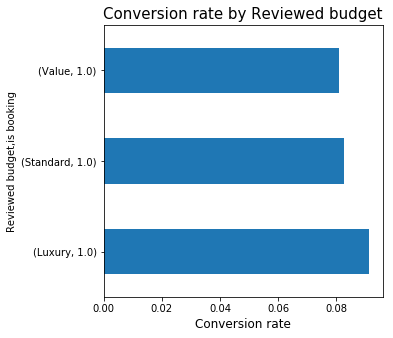

In [358]:
df.groupby('Reviewed budget')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Reviewed budget", size=15);
plt.xlabel("Conversion rate", size=12);

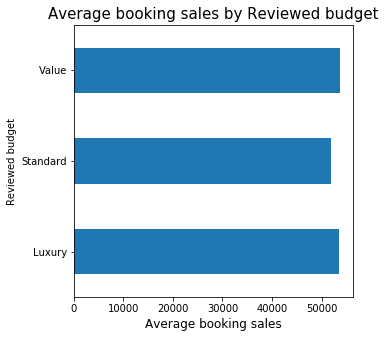

In [359]:
df[df['is booking']==1].groupby('Reviewed budget')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Reviewed budget", size=15);
plt.xlabel("Average booking sales", size=12);

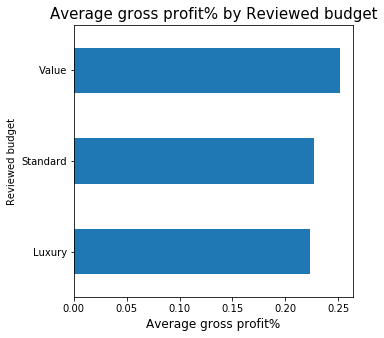

In [360]:
df[df['is booking']==1].groupby('Reviewed budget')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Reviewed budget", size=15);
plt.xlabel("Average gross profit%", size=12);

### Reviewed quality

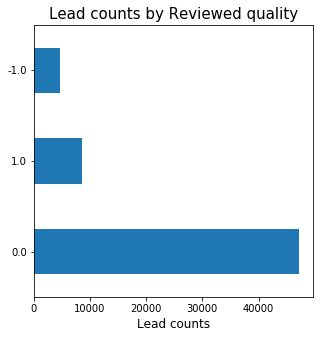

In [361]:
df['Reviewed quality'].value_counts().plot.barh();
plt.title("Lead counts by Reviewed quality", size=15);
plt.xlabel("Lead counts", size=12);

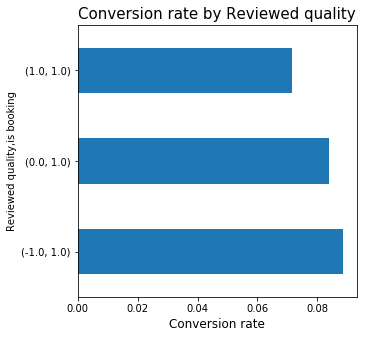

In [362]:
df.groupby('Reviewed quality')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Reviewed quality", size=15);
plt.xlabel("Conversion rate", size=12);

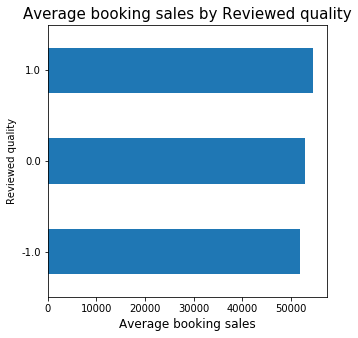

In [363]:
df[df['is booking']==1].groupby('Reviewed quality')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Reviewed quality", size=15);
plt.xlabel("Average booking sales", size=12);

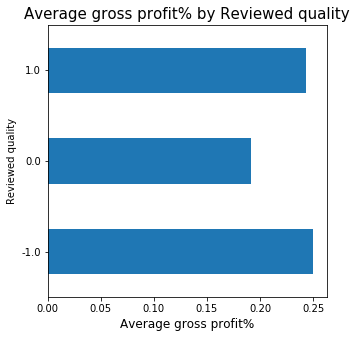

In [366]:
df[df['is booking']==1].groupby('Reviewed quality')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Reviewed quality", size=15);
plt.xlabel("Average gross profit%", size=12);

In [519]:
# create a new column "User type" to cobine "User agent", "User repeat", and "User referral"
df['User type'] = np.NaN

In [520]:
df.loc[df['User agent'] == 1,'User type'] = 'agent'
df.loc[df['User repeat'] == 1,'User type'] = 'repeat'
df.loc[df['User referral'] == 1,'User type'] = 'referral'

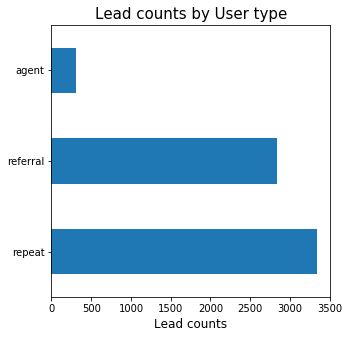

In [521]:
df['User type'].value_counts().plot.barh();
plt.title("Lead counts by User type", size=15);
plt.xlabel("Lead counts", size=12);

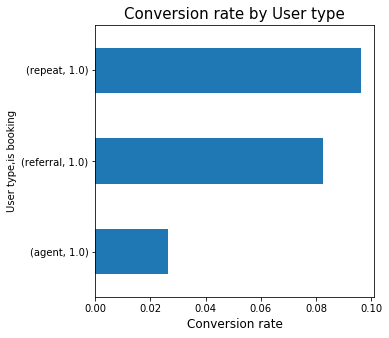

In [380]:
df.groupby('User type')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by User type", size=15);
plt.xlabel("Conversion rate", size=12);

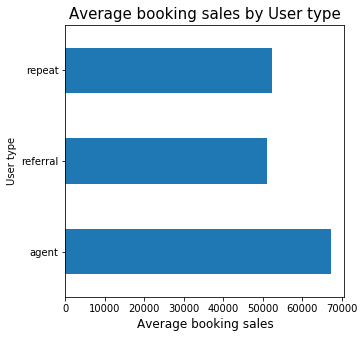

In [381]:
df[df['is booking']==1].groupby('User type')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by User type", size=15);
plt.xlabel("Average booking sales", size=12);

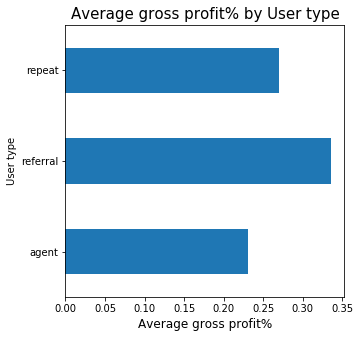

In [382]:
df[df['is booking']==1].groupby('User type')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by User type", size=15);
plt.xlabel("Average gross profit%", size=12);

### emails / calls

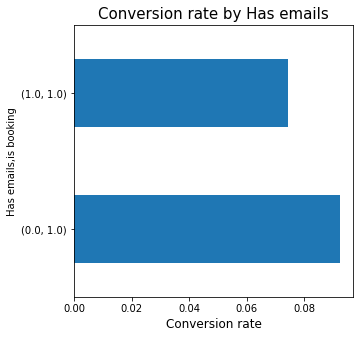

In [388]:
df.groupby('Has emails')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Has emails", size=15);
plt.xlabel("Conversion rate", size=12);

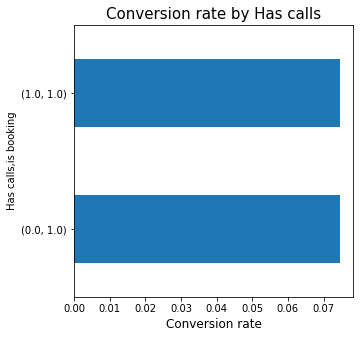

In [389]:
df.groupby('Has calls')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Has calls", size=15);
plt.xlabel("Conversion rate", size=12);

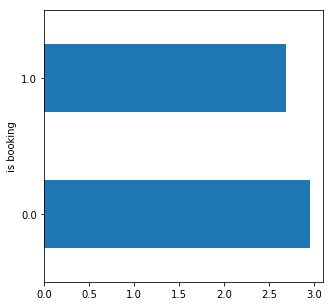

In [397]:
df.groupby('is booking')["Client email"].mean().plot.barh();

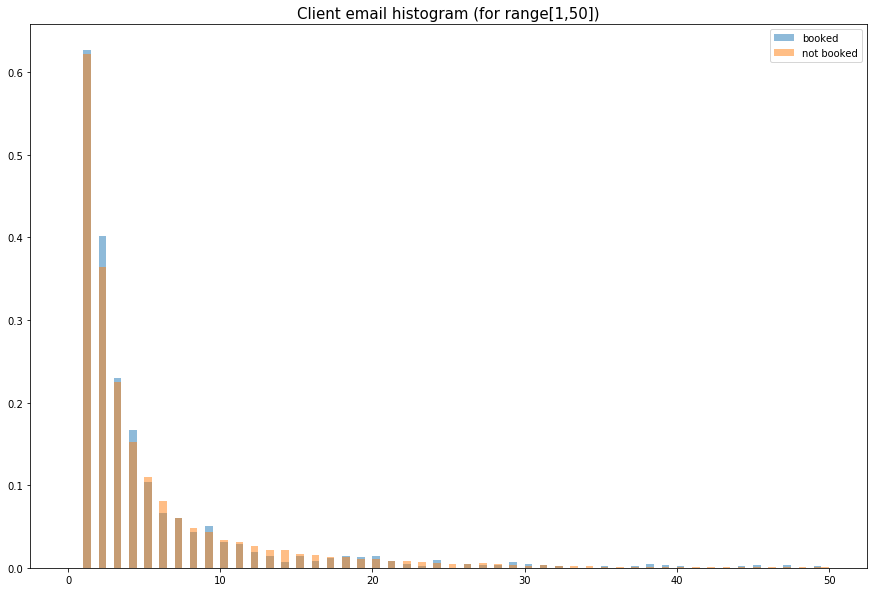

In [430]:
from matplotlib import pyplot

matplotlib.rcParams['figure.figsize'] = [15, 10]
pyplot.hist(df[(df['is booking']==1)&(df['Client email']!=0)]["Client email"],bins=100,alpha=0.5,label='booked',density=True,range=(0,50))
pyplot.hist(df[(df['is booking']==0)&(df['Client email']!=0)]["Client email"],bins=100,alpha=0.5,label='not booked',density=True,range=(0,50))
pyplot.title('Client email histogram (for range[1,50])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

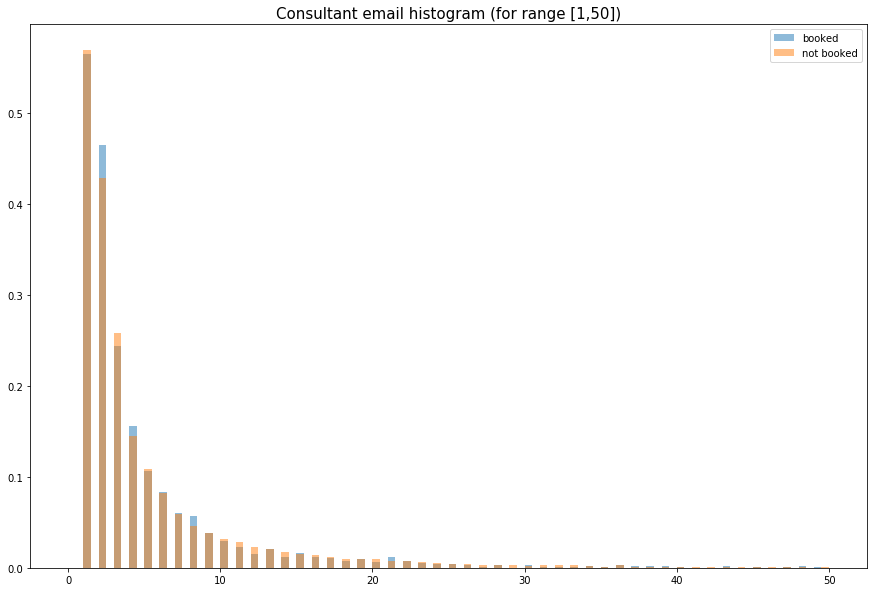

In [431]:
pyplot.hist(df[(df['is booking']==1)&(df['Consultant email']!=0)]["Consultant email"],bins=100,alpha=0.5,label='booked',density=True,range=(0,50))
pyplot.hist(df[(df['is booking']==0)&(df['Consultant email']!=0)]["Consultant email"],bins=100,alpha=0.5,label='not booked',density=True,range=(0,50))
pyplot.title('Consultant email histogram (for range [1,50])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

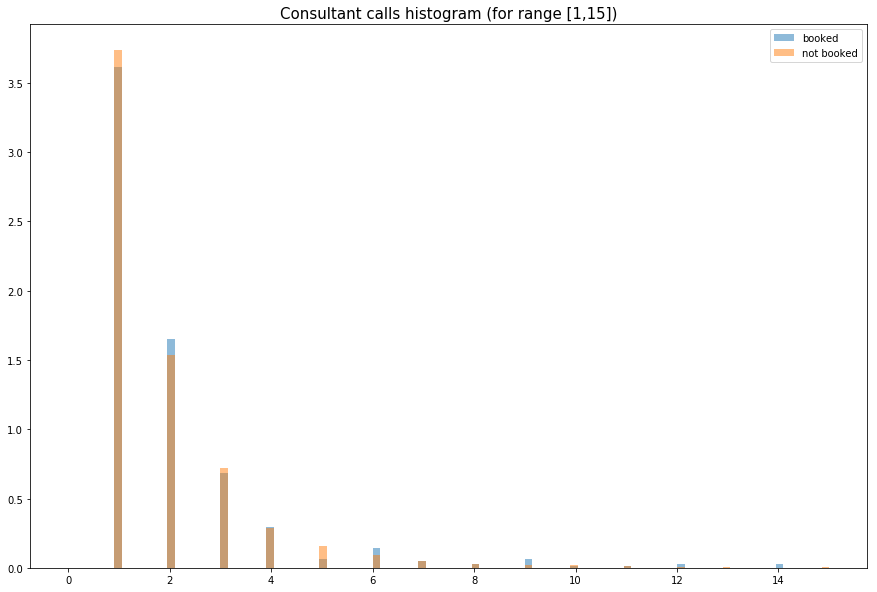

In [432]:
pyplot.hist(df[(df['is booking']==1)&(df['Consultant calls']!=0)]["Consultant calls"],bins=100,alpha=0.5,label='booked',density=True,range=(0,15))
pyplot.hist(df[(df['is booking']==0)&(df['Consultant calls']!=0)]["Consultant calls"],bins=100,alpha=0.5,label='not booked',density=True,range=(0,15))
pyplot.title('Consultant calls histogram (for range [1,15])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

In [433]:
matplotlib.rcParams['figure.figsize'] = [5, 5]

### Lead status 

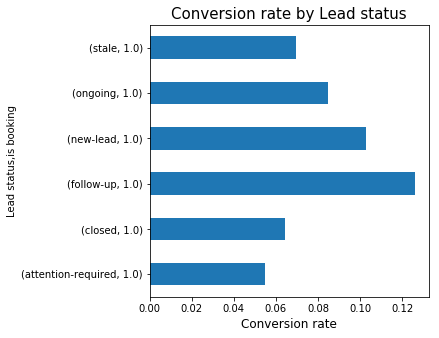

In [435]:
df.groupby('Lead status')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Lead status", size=15);
plt.xlabel("Conversion rate", size=12);

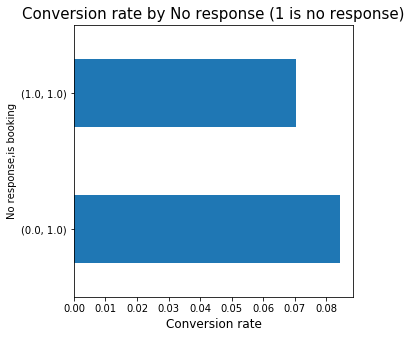

In [442]:
df.groupby('No response')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by No response (1 is no response)", size=15);
plt.xlabel("Conversion rate", size=12);


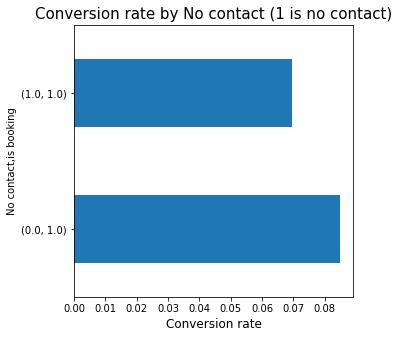

In [443]:
df.groupby('No contact')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by No contact (1 is no contact)", size=15);
plt.xlabel("Conversion rate", size=12);


### GA

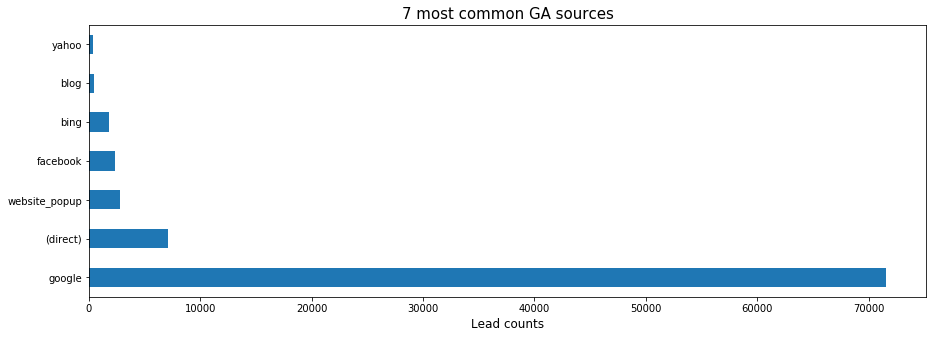

In [449]:
df['GA source'].value_counts().head(7).plot.barh(figsize=(15,5));
plt.title("7 most common GA sources", size=15);
plt.xlabel("Lead counts", size=12);

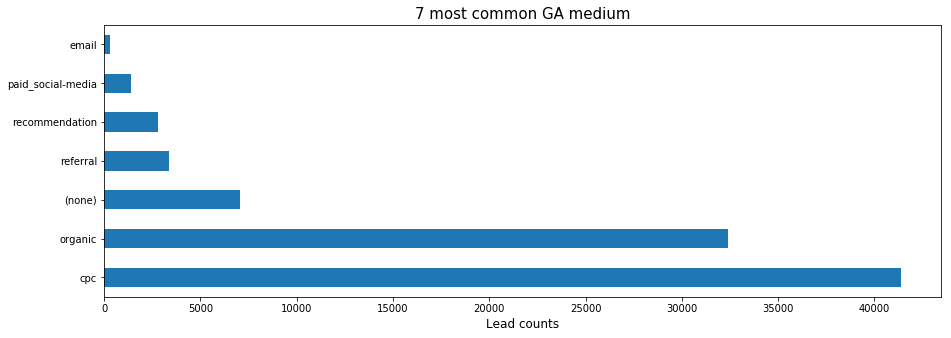

In [453]:
df['GA medium'].value_counts().head(7).plot.barh(figsize=(15,5));
plt.title("7 most common GA medium", size=15);
plt.xlabel("Lead counts", size=12);

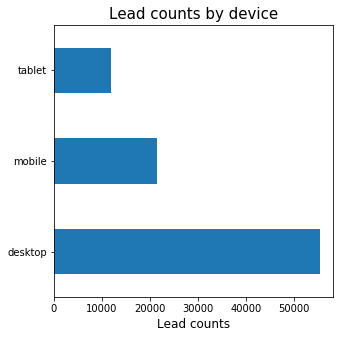

In [454]:
df['Device'].value_counts().plot.barh();
plt.title("Lead counts by device", size=15);
plt.xlabel("Lead counts", size=12);

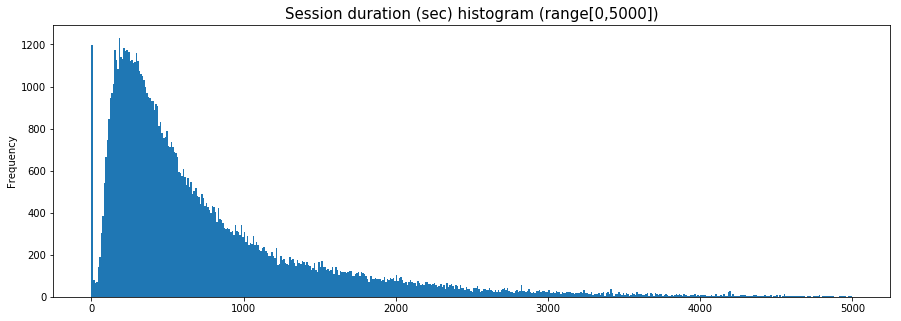

In [474]:
df['Session duration'].plot.hist(bins=500,range=(0,5000),figsize=(15,5));
plt.title('Session duration (sec) histogram (range[0,5000])',size=15);

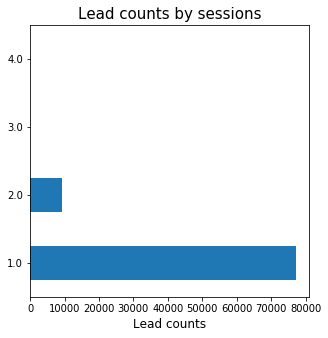

In [468]:
df['Sessions'].value_counts().plot.barh();
plt.title("Lead counts by sessions", size=15);
plt.xlabel("Lead counts", size=12);

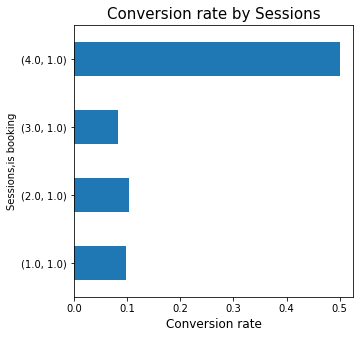

In [469]:
df.groupby('Sessions')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Sessions", size=15);
plt.xlabel("Conversion rate", size=12);

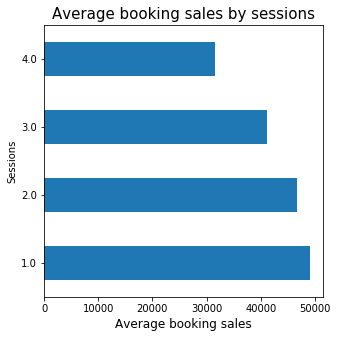

In [470]:
df[df['is booking']==1].groupby('Sessions')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by sessions", size=15);
plt.xlabel("Average booking sales", size=12);

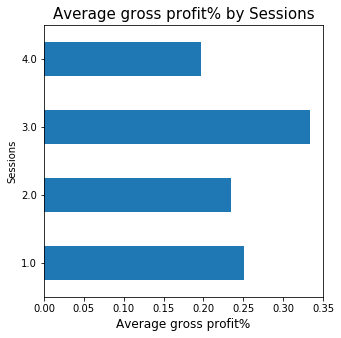

In [471]:
df[df['is booking']==1].groupby('Sessions')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Sessions", size=15);
plt.xlabel("Average gross profit%", size=12);

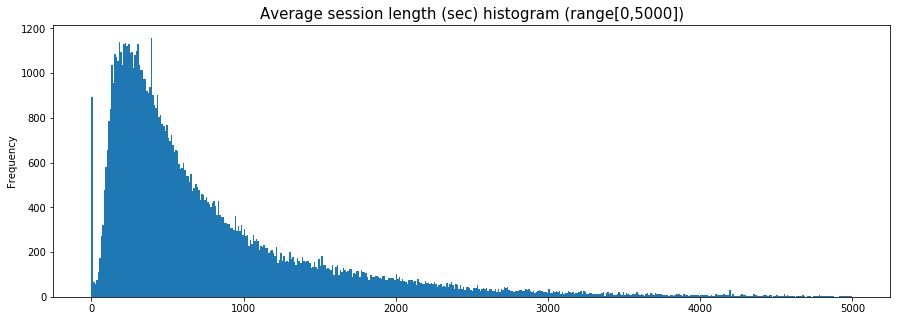

In [473]:
df['Avg. session length (sec)'].plot.hist(bins=500,range=(0,5000),figsize=(15,5));
plt.title('Average session length (sec) histogram (range[0,5000])',size=15);

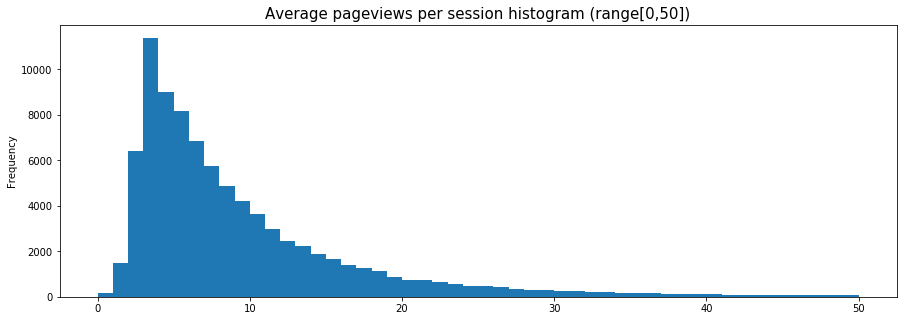

In [485]:
df['Avg. pageviews per session'].plot.hist(bins=50,range=(0,50),figsize=(15,5));
plt.title('Average pageviews per session histogram (range[0,50])',size=15);

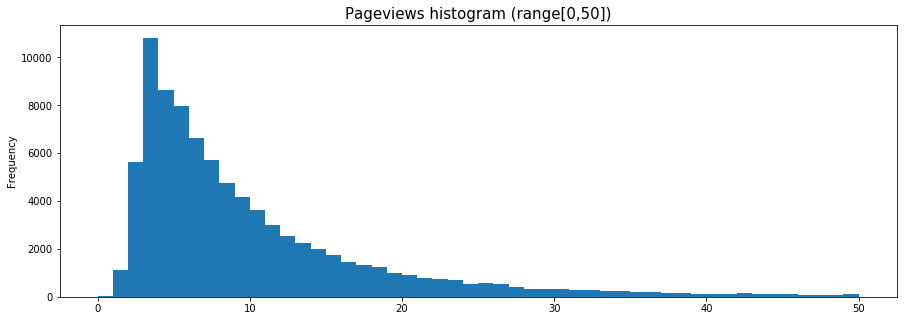

In [497]:
df['Pageviews'].plot.hist(bins=50,range=(0,50),figsize=(15,5));
plt.title('Pageviews histogram (range[0,50])',size=15);

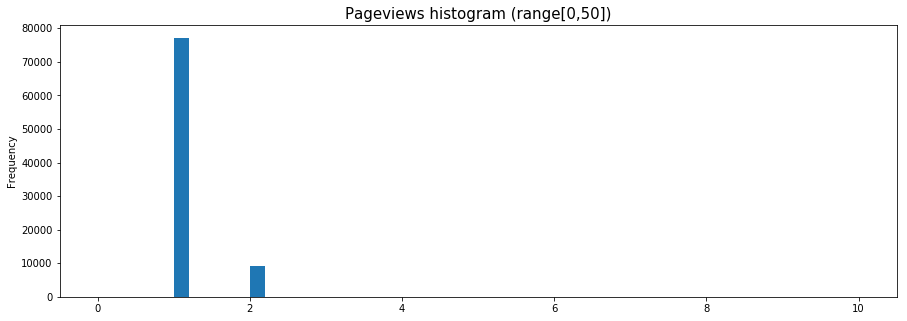

In [499]:
df['Hits'].plot.hist(bins=50,range=(0,10),figsize=(15,5));
plt.title('Pageviews histogram (range[0,50])',size=15);

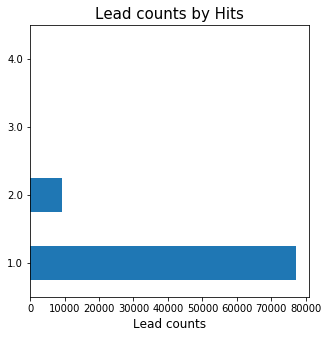

In [503]:
df['Hits'].value_counts().plot.barh();
plt.title("Lead counts by Hits", size=15);
plt.xlabel("Lead counts", size=12);

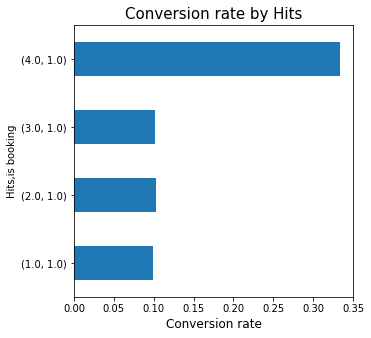

In [504]:
df.groupby('Hits')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).plot.barh();
plt.title("Conversion rate by Hits", size=15);
plt.xlabel("Conversion rate", size=12);

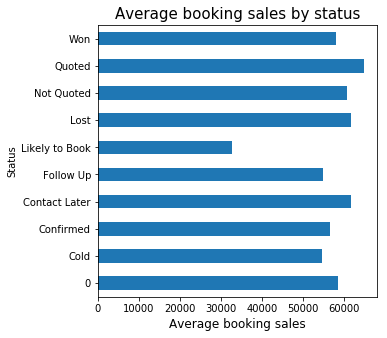

In [509]:
df[df['is booking']==1].groupby('Status')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by status", size=15);
plt.xlabel("Average booking sales", size=12);

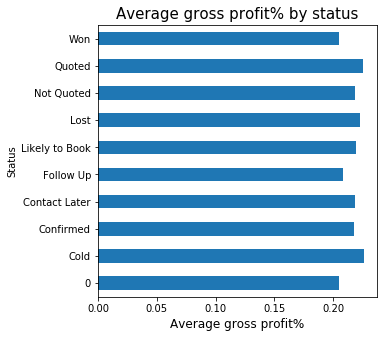

In [508]:
df[df['is booking']==1].groupby('Status')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by status", size=15);
plt.xlabel("Average gross profit%", size=12);

In [512]:
df['Status Type'].value_counts()

inactive    7099
open        5595
0             45
Name: Status Type, dtype: int64

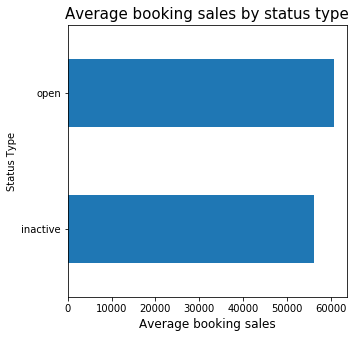

In [513]:
df[(df['is booking']==1)&(df['Status Type']!='0')].groupby('Status Type')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by status type", size=15);
plt.xlabel("Average booking sales", size=12);

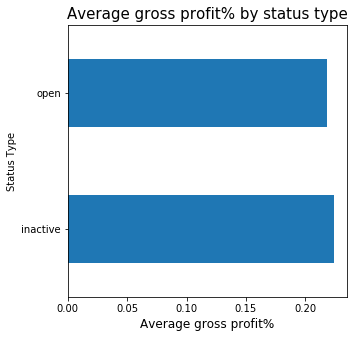

In [514]:
df[(df['is booking']==1)&(df['Status Type']!='0')].groupby('Status Type')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by status type", size=15);
plt.xlabel("Average gross profit%", size=12);

In [522]:
df['Enquiry open/dead'] = np.NaN

In [523]:
df.loc[df['Enquiry open'] == 1,'Enquiry open/dead'] = 'open'
df.loc[df['Enquiry dead'] == 1,'Enquiry open/dead'] = 'dead'

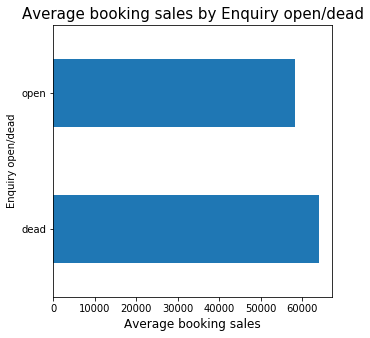

In [524]:
df[df['is booking']==1].groupby('Enquiry open/dead')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Enquiry open/dead", size=15);
plt.xlabel("Average booking sales", size=12);

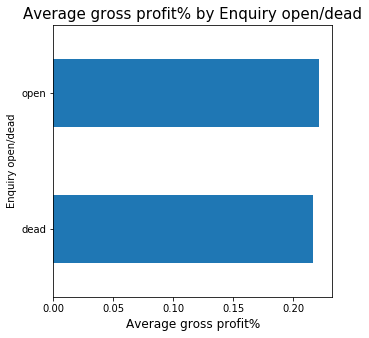

In [525]:
df[df['is booking']==1].groupby('Enquiry open/dead')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by Enquiry open/dead", size=15);
plt.xlabel("Average gross profit%", size=12);

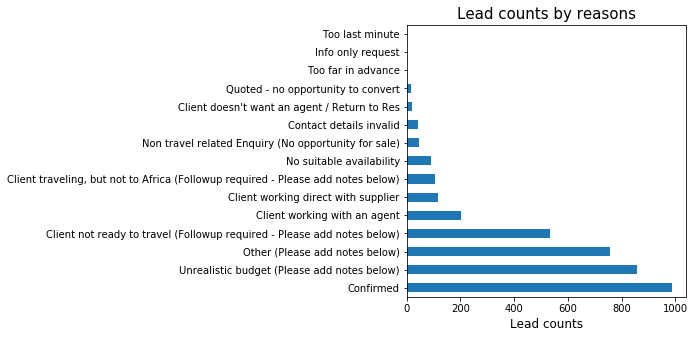

In [530]:
df['Reason'].value_counts().tail(-2).plot.barh();
plt.title('Lead counts by reasons',size=15);
plt.xlabel("Lead counts", size=12);

In [533]:
df[df['Quality']!='0']['Quality'].value_counts()

Bad (e.g. unrealistic expectations, not enough details)     2676
Unknown                                                     2553
Good (e.g. specific, descriptive, high level of details)    1955
Name: Quality, dtype: int64

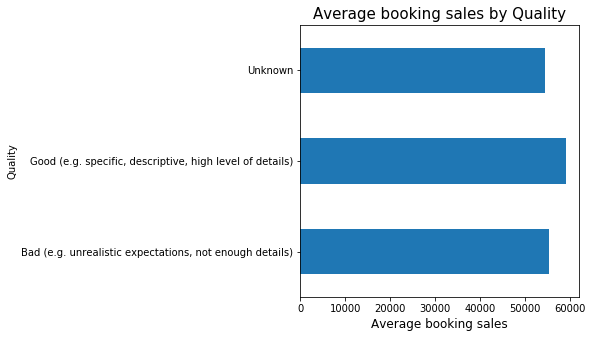

In [534]:
df[(df['is booking']==1) & (df['Quality']!='0')].groupby('Quality')["Sales (excl vat)"].mean().plot.barh();
plt.title("Average booking sales by Quality", size=15);
plt.xlabel("Average booking sales", size=12);

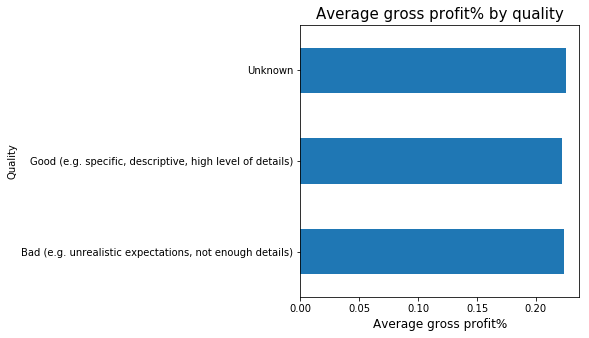

In [535]:
df[(df['is booking']==1)& (df['Quality']!='0')].groupby('Quality')['GP %'].mean().plot.barh();
plt.title("Average gross profit% by quality", size=15);
plt.xlabel("Average gross profit%", size=12);

### Time

In [537]:
# column "created", change the data type to datetime64[ns]
# then create a new column specifying month of enquiry submission

df['created'] = pd.to_datetime(df['created'])
df['Created month'] = df['created'].dt.month_name()

In [583]:
matplotlib.rcParams['figure.figsize'] = [5, 5]

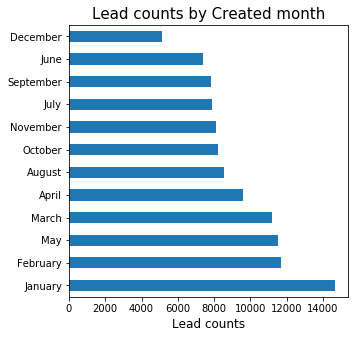

In [584]:
df['Created month'].value_counts().plot.barh();
plt.title("Lead counts by Created month", size=15);
plt.xlabel("Lead counts", size=12);

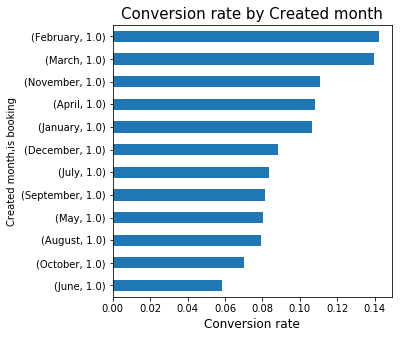

In [587]:
df.groupby('Created month')['is booking'].value_counts(normalize = True).xs(1, axis=0, level=1, drop_level=False).sort_values().plot.barh();
plt.title("Conversion rate by Created month", size=15);
plt.xlabel("Conversion rate", size=12);

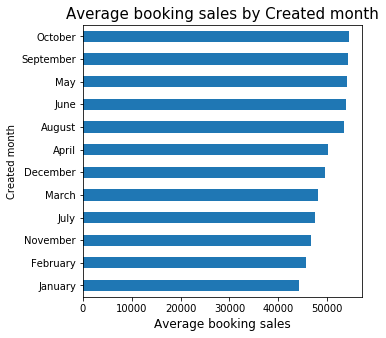

In [589]:
df[df['is booking']==1].groupby('Created month')["Sales (excl vat)"].mean().sort_values().plot.barh();
plt.title("Average booking sales by Created month", size=15);
plt.xlabel("Average booking sales", size=12);

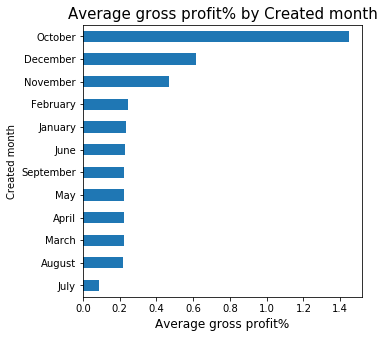

In [591]:
df[df['is booking']==1].groupby('Created month')['GP %'].mean().sort_values().plot.barh();
plt.title("Average gross profit% by Created month", size=15);
plt.xlabel("Average gross profit%", size=12);

In [538]:
df['Client last contact'] = pd.to_datetime(df['Client last contact'])

In [556]:
df['created to client last contact'] = df['Client last contact'].subtract(df['created'])/np.timedelta64(1,'D')

In [599]:
matplotlib.rcParams['figure.figsize'] = [15, 10]

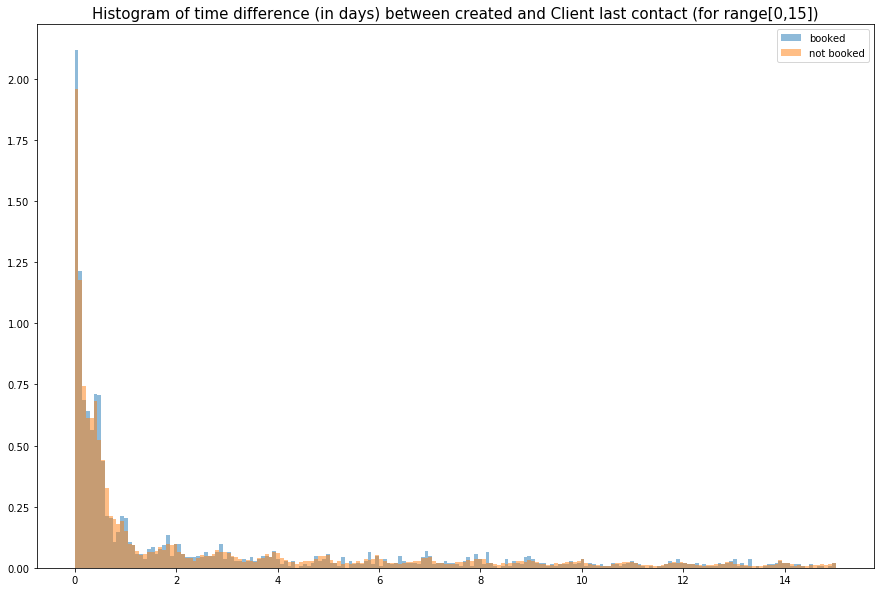

In [567]:
pyplot.hist(df[(df['is booking']==1)]["created to client last contact"],bins=200,alpha=0.5,label='booked',density=True,range=(0,15))
pyplot.hist(df[(df['is booking']==0)]["created to client last contact"],bins=200,alpha=0.5,label='not booked',density=True,range=(0,15))
pyplot.title('Histogram of time difference (in days) between created and Client last contact (for range[0,15])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

In [568]:
df['Consultant last contact'] = pd.to_datetime(df['Consultant last contact'])
df['created to consultant last contact'] = df['Consultant last contact'].subtract(df['created'])/np.timedelta64(1,'D')

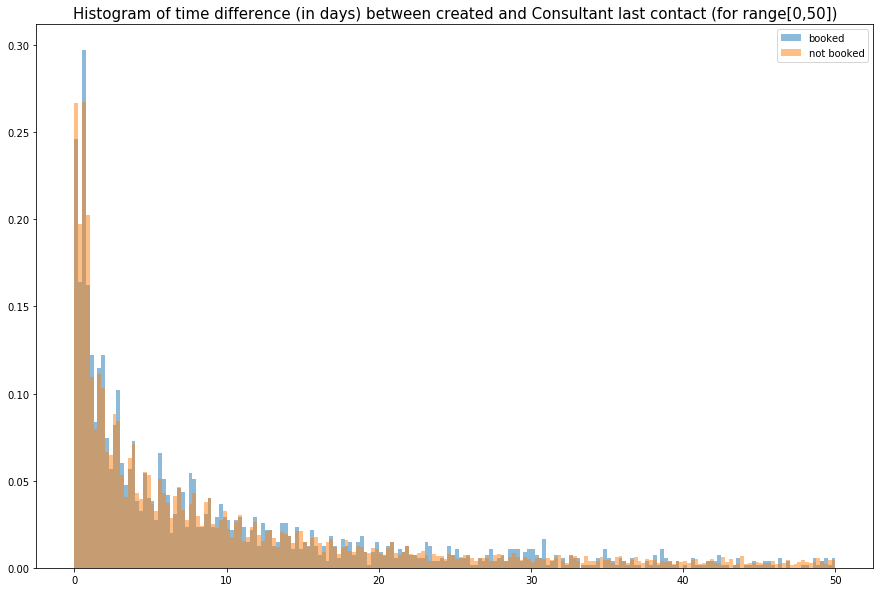

In [572]:
pyplot.hist(df[(df['is booking']==1)]["created to consultant last contact"],bins=200,alpha=0.5,label='booked',density=True,range=(0,50))
pyplot.hist(df[(df['is booking']==0)]["created to consultant last contact"],bins=200,alpha=0.5,label='not booked',density=True,range=(0,50))
pyplot.title('Histogram of time difference (in days) between created and Consultant last contact (for range[0,50])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

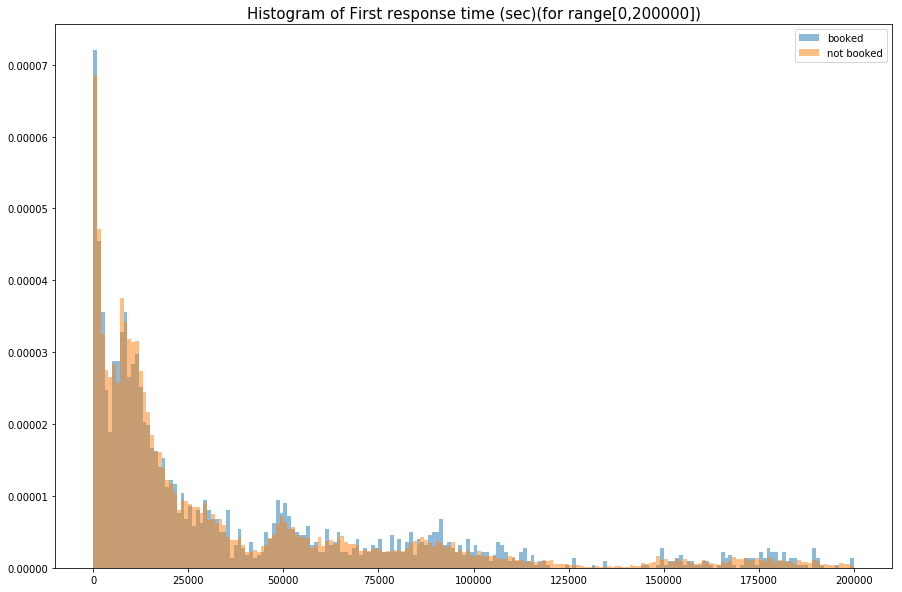

In [625]:
pyplot.hist(df[(df['is booking']==1)]["First response time"],bins=200,alpha=0.5,label='booked',density=True,range=(0,200000))
pyplot.hist(df[(df['is booking']==0)]["First response time"],bins=200,alpha=0.5,label='not booked',density=True,range=(0,200000))
pyplot.title('Histogram of First response time (sec)(for range[0,200000])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

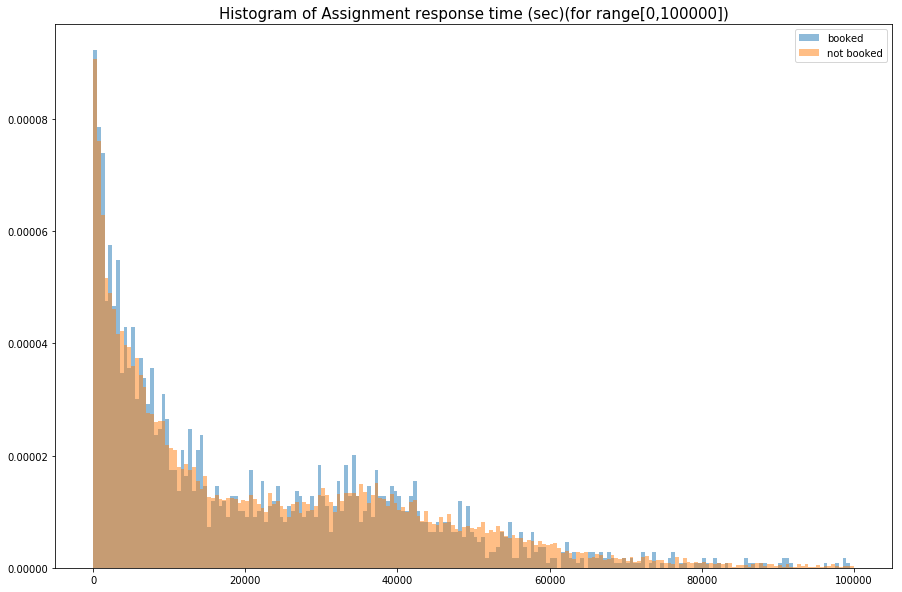

In [629]:
pyplot.hist(df[(df['is booking']==1)]["Assignment response time"],bins=200,alpha=0.5,label='booked',density=True,range=(0,100000))
pyplot.hist(df[(df['is booking']==0)]["Assignment response time"],bins=200,alpha=0.5,label='not booked',density=True,range=(0,100000))
pyplot.title('Histogram of Assignment response time (sec)(for range[0,100000])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

In [592]:
# column "Arrival date", "Departure date", change data type to datetime64[ns]

df['Arrival date'] = pd.to_datetime(df['Arrival date'], dayfirst = True,errors = 'coerce')
df['Departure date'] = pd.to_datetime(df['Departure date'], dayfirst = True,errors = 'coerce')

In [593]:
# Create a column "Created to arrival" that contains the time difference between "Created" and "Arrival date"

df["Created to arrival"] = df['Arrival date'].subtract(df['created'])/np.timedelta64(1,'D')

In [594]:
# There are some rows that have no "Arrival date" value but have "Arrival date text" and "created" values
# Now we can try calculate more values for "Created to arrival" by subtracting "created" from a cleaned version of "Arrival date text"


In [595]:
# Since 26459 out of 27038 of the values in "Arrival date text" are in qualified "month-abbrev two-digit-year" format
# We will drop all of the rest disqualified values and change this column into a datetime 64 datatype

df['Arrival date text'] = pd.to_datetime(df['Arrival date text'], format='%b %y',errors = 'coerce')

In [596]:
useful_adt_rows = (df['Created to arrival'].isnull()) & (df['Arrival date text'].notnull()) & (df['created'].notnull())


In [597]:
# There are 26429 rows that dont have "Created to arrival" yet have "Arrival date text" and "created"
# So we'll calculate the time difference for these rows and fill in the "Created to arrival" column

df.loc[useful_adt_rows,'Created to arrival'
      ] = df['Arrival date text'].subtract(df['created'])/np.timedelta64(1,'D')

In [598]:
# some time differences are negative numbers, which make the 'Arrival date','Departure date' data invalid 
# so we need to drop 'Arrival date','Departure date','Created to arrival' data for rows with negative time difference

df.loc[df['Created to arrival'] < 0,['Arrival date','Departure date','Created to arrival']] = np.nan


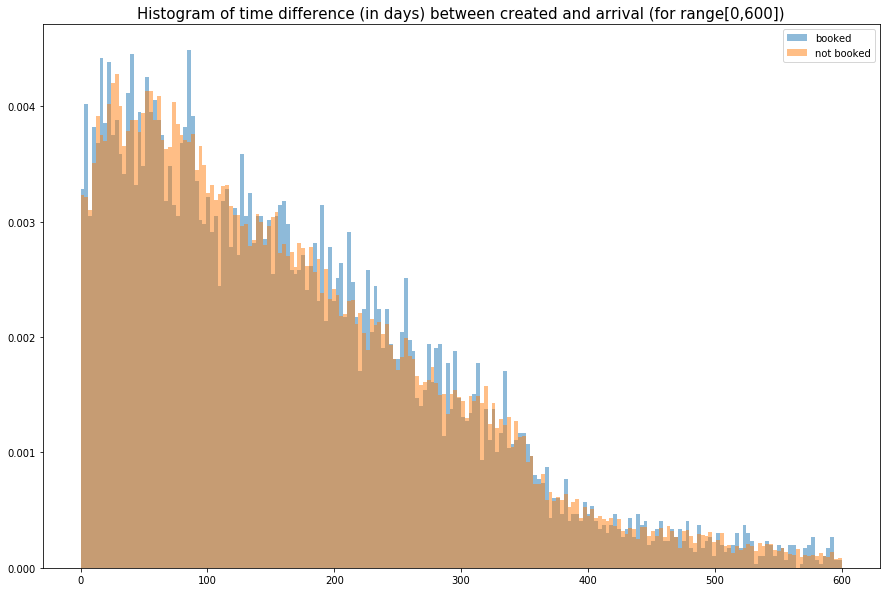

In [603]:
pyplot.hist(df[(df['is booking']==1)]["Created to arrival"],bins=200,alpha=0.5,label='booked',density=True,range=(0,600))
pyplot.hist(df[(df['is booking']==0)]["Created to arrival"],bins=200,alpha=0.5,label='not booked',density=True,range=(0,600))
pyplot.title('Histogram of time difference (in days) between created and arrival (for range[0,600])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()

In [604]:
# 33546 out of the 55818 valuable rows of "Stay duration" are numbers
# so we can change these to float type and fill them into "Num nights" column correspondingly

In [605]:
isnumber = df['Stay duration'].str.isnumeric() == True

In [606]:
df.loc[isnumber, 'Num nights'] = pd.to_numeric(df.loc[isnumber,'Stay duration'])

In [607]:
# For "Stay duration", we can fill in nan values for the rows that 
# have "Num nights" value and focus on the rest of the non-empty rows

df.loc[(df['Num nights'].notnull()), 'Stay duration'] = np.nan

In [608]:
# A lof of such cells contain strings ending with "nights" or "day" or "days day", so we can strip these strings off


In [609]:
df['Stay duration'] = df['Stay duration'].str.rstrip(' nights')

In [610]:
df['Stay duration'] = df['Stay duration'].str.rstrip(' day')

In [611]:
df['Stay duration'] = df['Stay duration'].str.rstrip(' days day')

In [612]:
# many cells contains "-" to connect the range of two numbers
# for these cells, we split the cell based on "-", 
# for those that are split into two strings, we assume they represent the range of the stay duration
# and calculate the mean value for this range by first convert them into float


In [613]:
dash = df['Stay duration'].str.contains('-',na=False) == True

In [614]:
df['Stay duration'] = df.loc[dash,'Stay duration'].str.split('-')

In [615]:
def avehelper(x):
    if type(x) == list:
        if len(x) ==2:
            if x[0].strip().isdigit() and x[1].strip().isdigit():
                return 1
        return x

In [616]:
qualified_helper = df['Stay duration'].apply(avehelper) == 1
df.loc[qualified_helper].shape

(16223, 74)

In [617]:
df.loc[qualified_helper,'Num nights'] = df.loc[qualified_helper]['Stay duration'].apply(
    lambda x: (int(x[1].strip()) - int(x[0].strip()))/2)

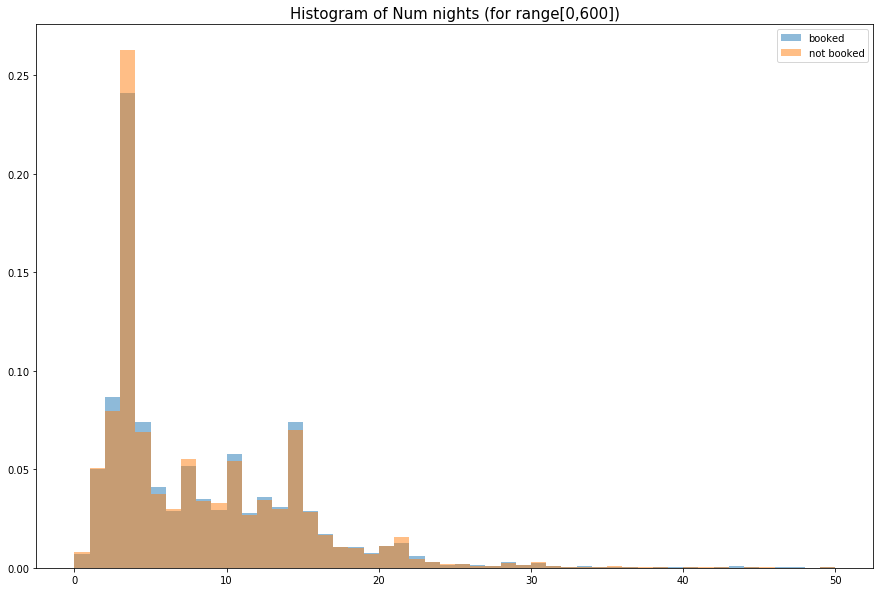

In [622]:
pyplot.hist(df[(df['is booking']==1)]["Num nights"],bins=50,alpha=0.5,label='booked',density=True,range=(0,50))
pyplot.hist(df[(df['is booking']==0)]["Num nights"],bins=50,alpha=0.5,label='not booked',density=True,range=(0,50))
pyplot.title('Histogram of Num nights (for range[0,600])',size=15)
pyplot.legend(loc='upper right')
pyplot.show()